# Abalone

Group 18 Members:

- Clara Pichler, 11917694
- Hannah Knapp, 11901857 
- Sibel Toprakkiran, 09426341

### Overview

1. Introduction
- Requirements & Dependencies
- Loading in the Data Sets

2. Preprocessing

3. Classification
- SVM
- Random Forest
- Multilayer Perceptron

4. Analysis of Performance

## Introduction


### Requirements & Dependencies

This project was created using Python 3.12.5 The exact versions of the dependencies can be installed with the following command.

In [65]:
%pip install -r requirements.txt -q

Note: you may need to restart the kernel to use updated packages.


In [66]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import pprint as pp

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from tpot import TPOTClassifier
from time import process_time, time

from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

### Loading in the Data Set

In [67]:
import os
#print(os.listdir("./data"))

In [68]:
# Load the Dataset
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
url='./data/abalone.csv'
column_names = ["Sex", "Length", "Diameter", "Height", "Whole_weight", "Shucked_weight", "Viscera_weight", "Shell_weight", "Rings"]
abalone_df = pd.read_csv(url, header=0, names=column_names)

## Preprocessing

In this section we will go over the pre processing of the data set. We take a look at the types of the attributes, outliers, normalisation/standardisation, feature selection and if the data set has missing values and if yes how do we deal with it accordingly. 

In [69]:
display(abalone_df.head(5))
display(abalone_df.info(verbose=True))
display(abalone_df.describe())
display(abalone_df['Rings'].unique())

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


None

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

The minimum value for height is 0, so there are values which are 0 for height in the dataset.

In [70]:
abalone_df[abalone_df.Height == 0]
abalone_df = abalone_df[abalone_df.Height != 0]
display(abalone_df['Height'].describe())

count    4175.000000
mean        0.139583
std         0.041725
min         0.010000
25%         0.115000
50%         0.140000
75%         0.165000
max         1.130000
Name: Height, dtype: float64

In [71]:
# Handling Categorical Data - One Hot Encoding
#abalone_encoded = pd.get_dummies(abalone_df, columns=['Sex'], drop_first=False)
#abalone_encoded.head()
def encode_sex(df):
    df = df.replace("I", 0).replace("F", 1).replace("M", 2)
    df['Sex'] = df['Sex'].astype(int)
    return df

In [72]:
abalone_encoded = encode_sex(abalone_df)
display(abalone_encoded.head())

C:\Users\a428977\AppData\Local\Temp\ipykernel_19432\3826663000.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace("I", 0).replace("F", 1).replace("M", 2)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [73]:
#plotting a pair plot to check
#plt.figure(2, figsize = (12, 10))
#sns.pairplot(abalone_encoded)

The correlations can be done only on numerical colums. Below is the correlation matrix

In [74]:
numeric_features = abalone_encoded.select_dtypes(include=[np.number]).columns.tolist()
x = abalone_encoded[numeric_features].corr() 
correlation_matrix = abalone_encoded.corr() 

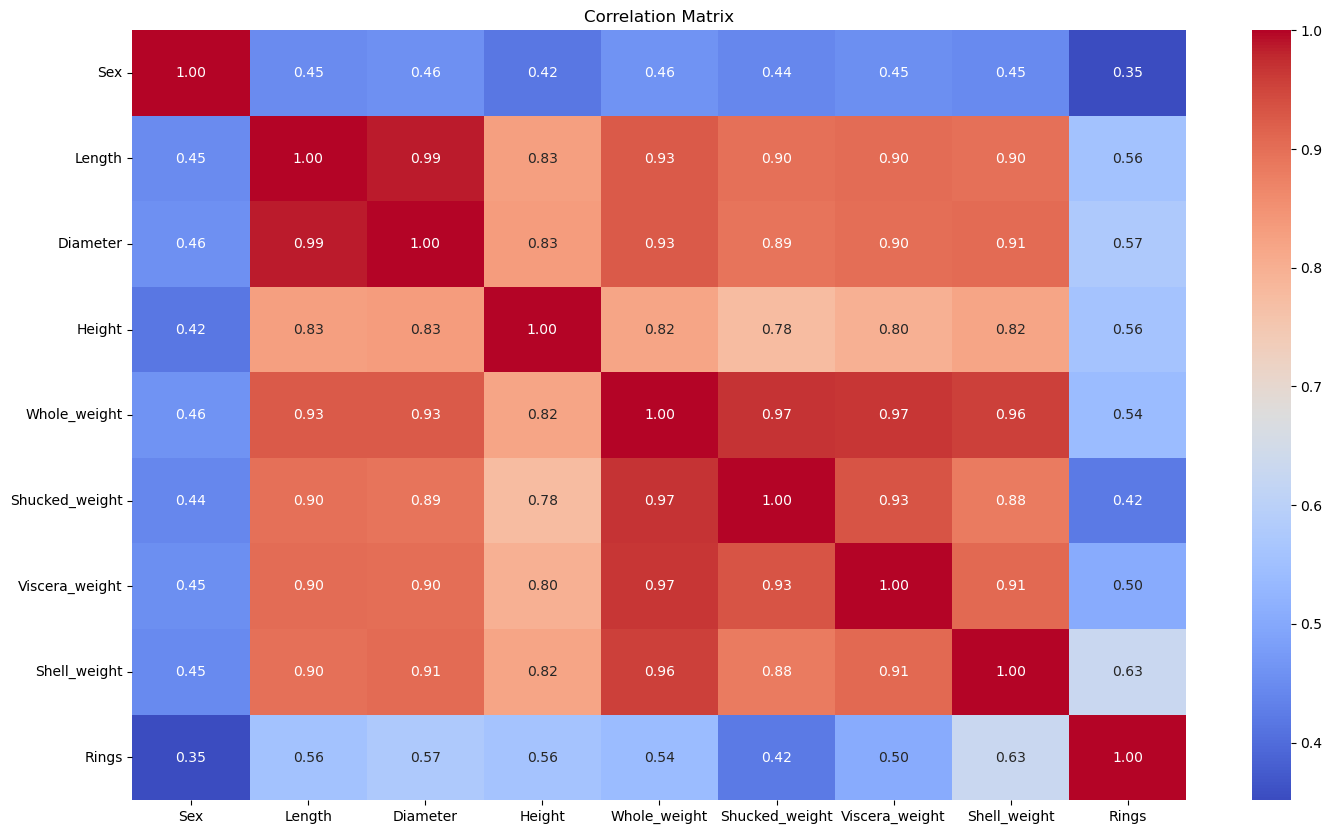

In [75]:
plt.figure(figsize=(17, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

As for outlier detection we can look at them viusally through histograms, scatter plots or boxplots, we decided to stick to the Interquartile Range (IQR) and also look at the z-score as comparison.

We look at some boxplots to see some outliers before and after Z_scale.

<Axes: xlabel='Rings', ylabel='Shell_weight'>

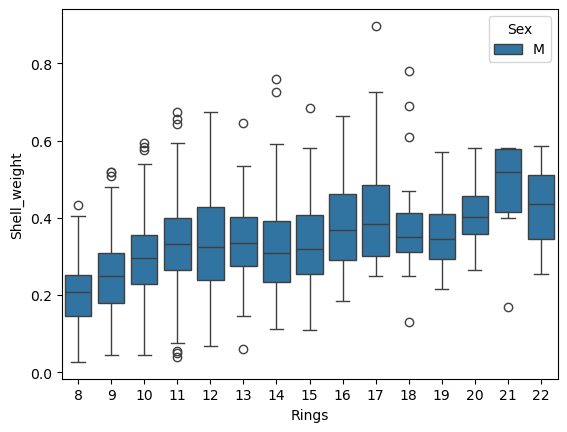

In [76]:
boxplot_outliers = (abalone_df.loc[abalone_df['Sex'].isin(['M'])]
    .loc[:,['Shell_weight','Rings','Sex']])
boxplot_outliers = boxplot_outliers[boxplot_outliers["Rings"] >= 8]
boxplot_outliers = boxplot_outliers[boxplot_outliers["Rings"] < 23]
sns.boxplot(x="Rings",y="Shell_weight", hue='Sex',data=boxplot_outliers)

<Axes: xlabel='Rings', ylabel='Length'>

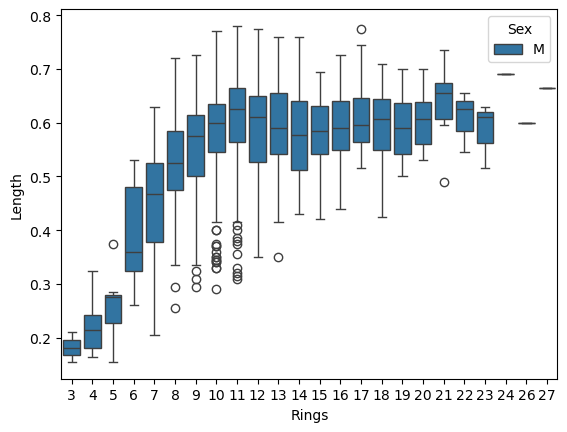

In [77]:
boxplot_outliers = (abalone_df.loc[abalone_df['Sex'].isin(['M'])]
    .loc[:,['Length','Rings','Sex']])

sns.boxplot(x="Rings",y="Length", hue='Sex',data=boxplot_outliers)


Below we demonstrate the distribution of Input Attributes, They look a bit skewed, so a scaler will be used after the train test split.

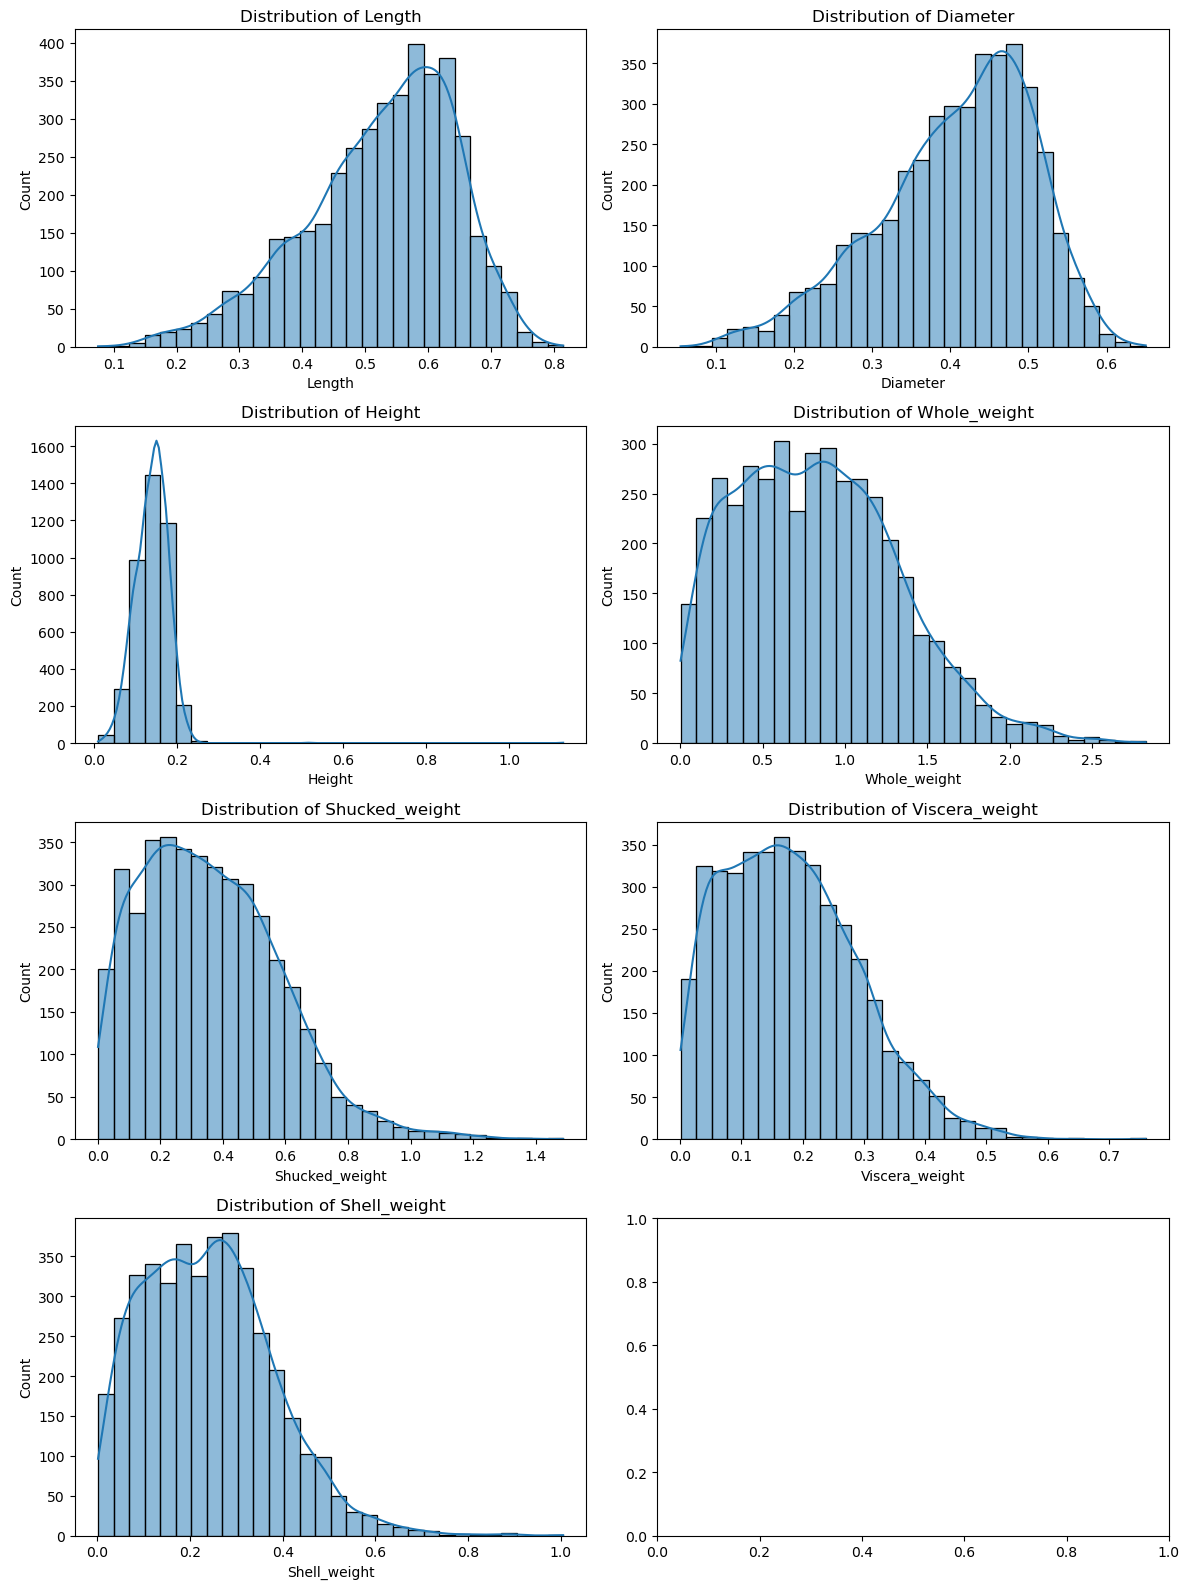

In [78]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
axes = axes.flatten()

for i, column in enumerate(abalone_encoded.columns[1:8]):  # Skip 'Sex' and 'Rings'
    sns.histplot(abalone_encoded[column], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()

In [79]:
def categorize_rings(rings):
    if rings < 8:
        return 'young'
    elif rings <= 12:
        return 'adult'
    else:
        return 'senior'

abalone_encoded['Rings_Category'] = abalone_encoded['Rings'].apply(categorize_rings)

In [80]:
def to_csv_file(predictions, df_test, name):
    df_predictions = pd.DataFrame({'ID': df_test['ID'], 'Class': predictions})
    path = 'predictions/' + name + '_predictions.csv'
    df_predictions.to_csv(path, index=False)

In [81]:
def df_scaling(train, test, scaler):
    return scaler.fit_transform(train), scaler.transform(test)

## Classification - Holdout

Our goal was always to classify the workout types of this data set, however, all models perform very badly. This can be because none of the other features are highly correlated with this column.
For training our classification models we will first have to split our data into training and testing data.

As well we define a function for all models that returns the confusion matrix and classification report.

We will calssify ring categorgy
We defined three categoried based on the rings, which are as follows:
- young -> up to 8 rings 
- adult -> between 8 and 12 rings
- senior -> more than 12 rings

In [82]:
def create_test_train(df):
    X_abalone = df.drop(['Rings', 'Rings_Category'], axis=1) 
    y_abalone = df['Rings_Category']  
    return train_test_split(X_abalone, y_abalone, random_state=42, test_size=0.25, shuffle=True, stratify=y_abalone)
    
X_train, X_test, y_train, y_test = create_test_train(abalone_encoded)

In [83]:
from sklearn.base import BaseEstimator, TransformerMixin

class IQRFilter(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=1.5):
        self.threshold = threshold
    
    def fit(self, X, y=None):
        self.columns_ = X.columns
        return self

    def transform(self, X, y=None):
        X_filtered = X.copy()
        for col in X_filtered.columns:
            Q1 = X_filtered[col].quantile(0.25)
            Q3 = X_filtered[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - self.threshold * IQR
            upper_bound = Q3 + self.threshold * IQR

            X_filtered[col] = np.where((X_filtered[col] < lower_bound), lower_bound, X_filtered[col])
            X_filtered[col] = np.where((X_filtered[col] > upper_bound), upper_bound, X_filtered[col])
        return X_filtered

In [84]:
from sklearn.base import BaseEstimator, TransformerMixin

class ZScoreFilter(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=3):
        self.threshold = threshold
    
    def fit(self, X, y=None):
        self.columns_ = X.columns
        return self

    def transform(self, X, y=None):
        X_filtered = X.copy()
        for col in X_filtered.columns:
            mean = X_filtered[col].mean()
            std = X_filtered[col].std()
            X_filtered[col] = np.where(np.abs(X_filtered[col] - mean) / std > self.threshold, mean, X_filtered[col])
        return X_filtered

In [96]:
def build_pipeline(classifier, search=0):
    if search == 0:
        return Pipeline(steps=[
            ('iqr_filter', IQRFilter(threshold=1.5)),
           # ('zscore_filter', ZScoreFilter(threshold=3)),
           # ('scaler', StandardScaler()),  
            # ('feature_selection', SelectKBest(score_func=f_classif, k=3)),  
            ('classifier', classifier),  
        ])
    
    return Pipeline(steps=[
            ('iqr_filter', IQRFilter(threshold=1.5)),
           # ('zscore_filter', ZScoreFilter(threshold=3)),
          #  ('scaler', StandardScaler()),  
            # ('feature_selection', SelectKBest(score_func=f_classif, k=3)),  
            ('classifier', search), 
        ])

In [109]:
def evaluate_classification(model, X_test, y_test, pipeline=None):
    
    if pipeline:
        print("parameters: ", pipeline.named_steps['classifier'].get_params(),"\n")
        predictions = pipeline.predict(X_test)

    else:
        print("parameters: ", model.get_params(),"\n")
        predictions = model.predict(X_test)
        
    accuracy = accuracy_score(y_test, predictions)
    #print("MAE %2f" %(-1 * accuracy.mean()) )
    
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy * 100))
    print('Classification Report:')
    print(classification_report(y_test, predictions, zero_division=1))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, predictions))
    
    return accuracy

### Random Forest

Below we create the base Random Forest Classifier and train the model

In [102]:
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['log2', 'sqrt'],
               'max_depth': max_depth,
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

In [103]:
rf_pip = build_pipeline(RandomForestClassifier(), RandomizedSearchCV(RandomForestClassifier(), param_distributions = random_grid, n_iter = 10, cv = 3, verbose=0, random_state=42, n_jobs = -1))

In [104]:
%%time
rf_pip.fit(X_train, y_train)

CPU times: total: 3.94 s
Wall time: 1min 40s


Pipeline(steps=[('iqr_filter', IQRFilter()),
                ('classifier',
                 RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                                    n_jobs=-1,
                                    param_distributions={'bootstrap': [True,
                                                                       False],
                                                         'max_depth': [10, 20,
                                                                       30, 40,
                                                                       50, 60,
                                                                       70, 80,
                                                                       90, 100,
                                                                       110,
                                                                       None],
                                                         'max_features': ['log2',
                                                                          'sqrt'],
                                                         'min_samples_leaf': [1,
                                                                              2,
                                                                              4],
                                                         'min_samples_split': [2,
                                                                               5,
                                                                               10],
                                                         'n_estimators': [200,
                                                                          400,
                                                                          600,
                                                                          800,
                                                                          1000,
                                                                          1200,
                                                                          1400,
                                                                          1600,
                                                                          1800,
                                                                          2000]},
                                    random_state=42))])

In [105]:
rf_random = rf_pip.named_steps['classifier']

In [106]:
print("Best parameter: ", rf_random.best_params_,"\n")
print('Best score for training data:', rf_random.best_score_,"\n") 

Best parameter:  {'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 100, 'bootstrap': True} 

Best score for training data: 0.7767473725585274 



In [107]:
%%time
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

CPU times: total: 266 ms
Wall time: 704 ms


RandomForestClassifier(random_state=42)

In [110]:
base_accuracy = evaluate_classification(rf_model, X_test, y_test)
    
best_model_rf = rf_random.best_estimator_

random_accuracy = evaluate_classification(best_model_rf,X_test, y_test, rf_pip)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

parameters:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False} 

Model Performance
Accuracy = 74.90%.
Classification Report:
              precision    recall  f1-score   support

       adult       0.77      0.87      0.82       661
      senior       0.60      0.41      0.49       173
       young       0.77      0.65      0.70       210

    accuracy                           0.75      1044
   macro avg       0.71      0.64      0.67      1044
weighted avg       0.74      0.75      0.74      1044

Confusion Matrix:
[[574  46  41]
 [101  71   1]
 [ 72   1 137]]
parameters:  {'cv': 3, 'error_score': nan, 'estimator__bootstrap':

In [111]:
random_1_pip = build_pipeline(RandomForestClassifier(n_estimators = 1000, max_features = 'log2', max_depth = 500, min_samples_split = 200, min_samples_leaf = 200, bootstrap = False))
random_1 = random_1_pip.named_steps['classifier']
random_1.fit(X_train, y_train)

random_2_pip = build_pipeline(RandomForestClassifier(n_estimators = 800, max_features = 'sqrt', max_depth = 65, min_samples_leaf = 30, bootstrap = True, criterion='log_loss'))
random_2 = random_2_pip.named_steps['classifier']
random_2.fit(X_train, y_train)

print(evaluate_classification(random_1, X_test, y_test, random_1_pip))
print(evaluate_classification(random_2, X_test, y_test, random_2_pip))

parameters:  {'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 500, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 200, 'min_samples_split': 200, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False} 

Model Performance
Accuracy = 72.80%.
Classification Report:
              precision    recall  f1-score   support

       adult       0.72      0.94      0.81       661
      senior       1.00      0.00      0.00       173
       young       0.77      0.67      0.71       210

    accuracy                           0.73      1044
   macro avg       0.83      0.53      0.51      1044
weighted avg       0.78      0.73      0.66      1044

Confusion Matrix:
[[620   0  41]
 [171   0   2]
 [ 70   0 140]]
0.7279693486590039
parameters:  {'bootstrap': True, 'ccp_al

### Support Vector Machines

In [112]:
params_grid_svm = [
    {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 0.1, 1, 5], 'C': [1, 10, 100, 1000]},
    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
    {'kernel': ['poly'], 'C': [1, 10, 100, 1000], 'degree': [2, 3, 4]}
]

svm_pip = build_pipeline(SVC(), GridSearchCV(SVC(), params_grid_svm, cv=5))

Now to train our SVM model.

In [113]:
%%time
svm_pip.fit(X_train, y_train)

CPU times: total: 2min 20s
Wall time: 7min 46s


Pipeline(steps=[('iqr_filter', IQRFilter()),
                ('classifier',
                 GridSearchCV(cv=5, estimator=SVC(),
                              param_grid=[{'C': [1, 10, 100, 1000],
                                           'gamma': [0.001, 0.0001, 0.1, 1, 5],
                                           'kernel': ['rbf']},
                                          {'C': [1, 10, 100, 1000],
                                           'kernel': ['linear']},
                                          {'C': [1, 10, 100, 1000],
                                           'degree': [2, 3, 4],
                                           'kernel': ['poly']}]))])

In [114]:
svm_model = svm_pip.named_steps['classifier']

In [115]:
print("Best parameter: ", svm_model.best_params_,"\n")
print('Best score for training data:', svm_model.best_score_,"\n") 
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

best_model_svm = svm_model.best_estimator_

Best parameter:  {'C': 1000, 'degree': 2, 'kernel': 'poly'} 

Best score for training data: 0.7872877080881117 

Best C: 1000 

Best Kernel: poly 

Best Gamma: scale 



In [116]:
base_svm = SVC(kernel='linear')
base_svm.fit(X_train, y_train)

svm_accuracy = evaluate_classification(base_svm, X_test, y_test)
svm_accuracy_best = evaluate_classification(best_model_svm, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (svm_accuracy_best - svm_accuracy) / svm_accuracy))

parameters:  {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False} 

Model Performance
Accuracy = 75.38%.
Classification Report:
              precision    recall  f1-score   support

       adult       0.74      0.94      0.83       661
      senior       0.85      0.16      0.27       173
       young       0.79      0.67      0.72       210

    accuracy                           0.75      1044
   macro avg       0.79      0.59      0.61      1044
weighted avg       0.77      0.75      0.71      1044

Confusion Matrix:
[[619   5  37]
 [145  28   0]
 [ 70   0 140]]
parameters:  {'C': 1000, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 2, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -

In [117]:
svm_1_pip = build_pipeline(SVC(C=1000, gamma=0.001, kernel='rbf'))
svm_1 = svm_1_pip.named_steps['classifier']
svm_1.fit(X_train, y_train)

svm_2_pip = build_pipeline(SVC(C=1000, kernel='linear', probability=True, random_state=42))
svm_2 = svm_2_pip.named_steps['classifier']
svm_2.fit(X_train, y_train)

print(evaluate_classification(svm_1, X_test, y_test, svm_1_pip))
print(evaluate_classification(svm_2, X_test, y_test, svm_2_pip))

parameters:  {'C': 1000, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False} 

Model Performance
Accuracy = 75.77%.
Classification Report:
              precision    recall  f1-score   support

       adult       0.75      0.93      0.83       661
      senior       0.80      0.23      0.36       173
       young       0.79      0.65      0.71       210

    accuracy                           0.76      1044
   macro avg       0.78      0.60      0.63      1044
weighted avg       0.77      0.76      0.73      1044

Confusion Matrix:
[[614  10  37]
 [133  40   0]
 [ 73   0 137]]
0.7576628352490421
parameters:  {'C': 1000, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linea

### Multilayer Percepton

In [44]:
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,), (10,20,20,25)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.1, 0.5],
    'max_iter': [2000, 3000, 5000, 7000],
    'learning_rate': ['constant','adaptive'],
}

In [45]:
%%time
mlp_pip = build_pipeline(MLPClassifier(), RandomizedSearchCV(MLPClassifier(), param_distributions=param_grid, n_iter = 100, cv = 3, random_state=42, n_jobs = -1, verbose=0))
mlp_pip.fit(X_train, y_train)

CPU times: total: 16.7 s
Wall time: 17min 51s


Pipeline(steps=[('iqr_filter', IQRFilter()), ('scaler', StandardScaler()),
                ('classifier',
                 RandomizedSearchCV(cv=3, estimator=MLPClassifier(), n_iter=100,
                                    n_jobs=-1,
                                    param_distributions={'activation': ['tanh',
                                                                        'relu',
                                                                        'logistic'],
                                                         'alpha': [0.0001, 0.05,
                                                                   0.1, 0.5],
                                                         'hidden_layer_sizes': [(50,
                                                                                 50,
                                                                                 50),
                                                                                (50,
                                                                                 100,
                                                                                 50),
                                                                                (100,),
                                                                                (10,
                                                                                 20,
                                                                                 20,
                                                                                 25)],
                                                         'learning_rate': ['constant',
                                                                           'adaptive'],
                                                         'max_iter': [2000,
                                                                      3000,
                                                                      5000,
                                                                      7000],
                                                         'solver': ['sgd',
                                                                    'adam']},
                                    random_state=42))])

In [46]:
mlp_model = mlp_pip.named_steps['classifier']

In [47]:
print("Best parameter: ", mlp_model.best_params_,"\n")
print('Best score for training data:', mlp_model.best_score_,"\n") 

Best parameter:  {'solver': 'adam', 'max_iter': 2000, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100,), 'alpha': 0.1, 'activation': 'relu'} 

Best score for training data: 0.7904827414778816 



In [64]:
base_mlp = MLPClassifier()
base_mlp.fit(X_train, y_train)

best_model_mlp = mlp_model.best_estimator_

base_accuracy = evaluate_classification(base_mlp, X_test, y_test)
random_accuracy = evaluate_classification(best_model_mlp,X_test, y_test, mlp_pip)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

parameters:  {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False} 

Model Performance
Accuracy = 77.01%.
Classification Report:
              precision    recall  f1-score   support

       adult       0.78      0.89      0.83       661
      senior       0.68      0.46      0.55       173
       young       0.79      0.66      0.72       210

    accuracy                           0.77      1044
   macro avg       0.75      0.67      0.70      1044
weighted avg       0.76      0.77      0.76      1044

Confusion Matrix:
[[586  37  38]
 [ 94  79   0]
 [ 71   0 13

C:\Work\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


NameError: name 'y_testt' is not defined

In [ ]:
mlp_1_pip = build_pipeline(MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(20, 25, 50, 50), max_iter=3000))
mlp_1 = mlp_1_pip.named_steps['classifier']
mlp_1.fit(X_train, y_train)

mlp_2_pip = build_pipeline(MLPClassifier(activation='tanh', alpha=0.5, hidden_layer_sizes=(10, 30, 30, 50), learning_rate='constant', max_iter=2000, solver='adam'))
mlp_2 = mlp_2_pip.named_steps['classifier']
mlp_2.fit(X_train, y_train)

print(evaluate_classification(mlp_1, X_test, y_test,mlp_1_pip))
print(evaluate_classification(mlp_2, X_test, y_test,mlp_2_pip))

## Classification - Cross Validation

The following are our best performing classifiers.

In [50]:
classifiers = {
    'SVM': SVC(C= 1000, degree= 4, kernel= 'poly'),
    'Random Forest': RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features= 'log2', max_depth= 70, bootstrap= True),
    'MLP': MLPClassifier(solver= 'adam', max_iter= 3000, learning_rate= 'constant', hidden_layer_sizes= (50, 50, 50), alpha= 0.5, activation= 'relu')
}

### KFold

In [53]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
print("K-Fold CV Results:")
for name, clf in classifiers.items():
    pipeline = build_pipeline(clf)

    y_pred = cross_val_predict(pipeline, X_test, y_test, cv=kf)
    scores = cross_val_score(pipeline, X_test, y_test, cv=kf, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}")

    report = classification_report(y_test, y_pred, zero_division=1)
    print(report)

K-Fold CV Results:
SVM: Mean Accuracy = 0.7337
              precision    recall  f1-score   support

       adult       0.75      0.88      0.81       661
      senior       0.55      0.27      0.36       173
       young       0.73      0.67      0.70       210

    accuracy                           0.73      1044
   macro avg       0.68      0.60      0.62      1044
weighted avg       0.72      0.73      0.71      1044

Random Forest: Mean Accuracy = 0.7529
              precision    recall  f1-score   support

       adult       0.77      0.88      0.82       661
      senior       0.65      0.35      0.46       173
       young       0.76      0.71      0.74       210

    accuracy                           0.76      1044
   macro avg       0.73      0.65      0.67      1044
weighted avg       0.75      0.76      0.75      1044

MLP: Mean Accuracy = 0.7711
              precision    recall  f1-score   support

       adult       0.79      0.87      0.83       661
      senior    

### Leave One Out

In [ ]:
loo = LeaveOneOut()
print("\nLOOCV Results:")
for name, clf in classifiers.items():
    pipeline = build_pipeline(clf)

    y_pred = cross_val_predict(pipeline, X_test, y_test, cv=loo)
    scores = cross_val_score(pipeline, X_test, y_test, cv=loo, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}")
    
    report = classification_report(y_test, y_pred, zero_division=1)
    print(report)

## Classification - Cross Validation with Sklearn

In [57]:
for name, clf in classifiers.items():
    pipeline = make_pipeline(IQRFilter(threshold=1.5),
                             StandardScaler(), 
                             SelectKBest(score_func=f_classif, k=3),
                             clf)
    print(name)

    cv_result = cross_validate(pipeline, X_test, y_test, cv=5)
    print(cv_result)

    y_pred = cross_val_predict(pipeline, X_test, y_test, cv=5)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy Score:")
    print(accuracy)

    class_report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(class_report)

    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

SVM
{'fit_time': array([ 31.21487689,  29.4335494 ,  39.65334606,  26.57815361,
       305.22376466]), 'score_time': array([0.02752233, 0.01699448, 0.0194478 , 0.01753974, 0.12378073]), 'test_score': array([0.66507177, 0.66507177, 0.66507177, 0.66985646, 0.6875    ])}
Accuracy Score:
0.6704980842911877
Classification Report:
              precision    recall  f1-score   support

       adult       0.66      0.98      0.79       661
      senior       0.83      0.03      0.06       173
       young       0.75      0.24      0.36       210

    accuracy                           0.67      1044
   macro avg       0.75      0.41      0.40      1044
weighted avg       0.71      0.67      0.58      1044

Confusion Matrix:
[[645   1  15]
 [166   5   2]
 [160   0  50]]
Random Forest
{'fit_time': array([0.2773304 , 0.27600908, 0.27915001, 0.27616858, 0.2579093 ]), 'score_time': array([0.03342581, 0.02850175, 0.02618313, 0.03663898, 0.02335429]), 'test_score': array([0.68421053, 0.74641148, 0.71